In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


# Load and Prepare the Dataset

In [3]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Add, PReLU, UpSampling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG19
import tensorflow as tf
from skimage.metrics import structural_similarity as ssim
from sklearn.model_selection import train_test_split

In [4]:
# Initialize lists to hold the images and labels
ship = []
no_ship = []

# Load ship images
for f in glob.iglob("C:/Users/eiibude/Documents/Data/ship/*.png"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    ship.append(img)

# Load no_ship images
for f in glob.iglob("C:/Users/eiibude/Documents/Data/no_ship/*.png"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    no_ship.append(img)

In [5]:
# Convert lists to numpy arrays
ship = np.array(ship)
no_ship = np.array(no_ship)
All = np.concatenate((no_ship, ship))

In [6]:
no_ship.shape

(3000, 224, 224, 3)

In [7]:
ship.shape

(1000, 224, 224, 3)

In [8]:
np.random.choice(10, 5, replace=False)

array([0, 7, 6, 8, 1])

# Viasualize the Dataset

In [9]:
def plot_random(no_ship, ship, num=5):
    no_ship_imgs = no_ship[np.random.choice(no_ship.shape[0], num, replace=False)]
    ship_imgs = ship[np.random.choice(ship.shape[0], num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('no ship')
        plt.imshow(no_ship_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('ship')
        plt.imshow(ship_imgs[i])

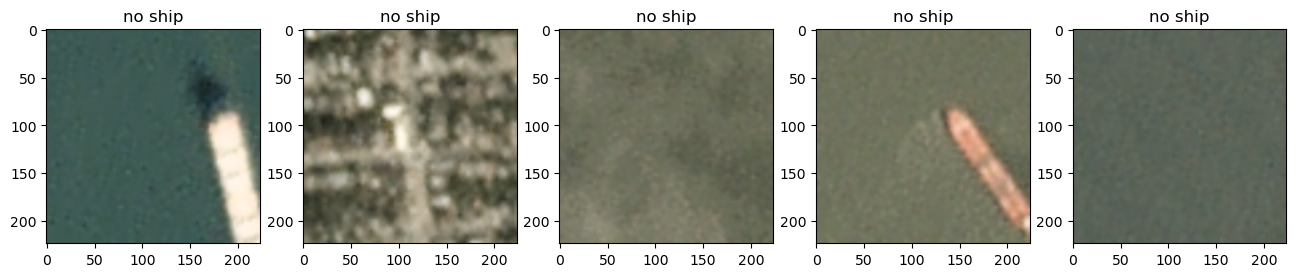

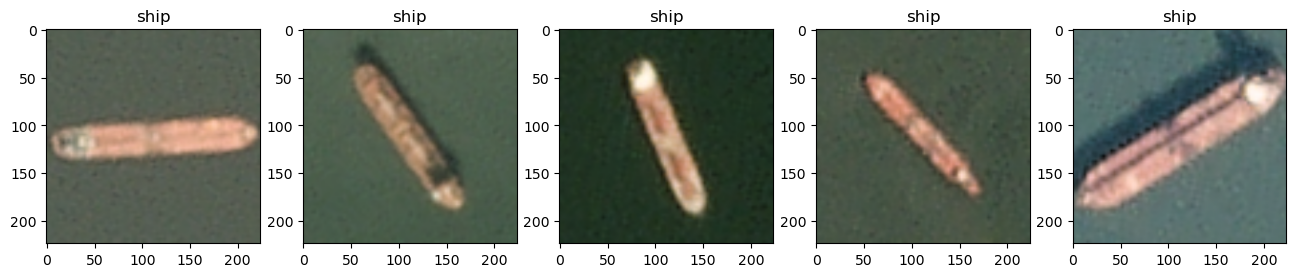

In [10]:
plot_random(no_ship, ship, num=5)

In [11]:
# Prepare labels
ship_labels = np.ones(len(ship))
no_ship_labels = np.zeros(len(no_ship))

In [12]:
# Concatenate data and labels
images = np.concatenate((no_ship, ship), axis=0)
labels = np.concatenate((no_ship_labels, ship_labels), axis=0)

In [13]:
# Normalize the data to [0, 1] range
images = images / 255.0

# Split the Dataset

In [14]:
# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [15]:
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, BatchNormalization, Add, PReLU, UpSampling2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras import layers, models

# Design CNN Model

In [16]:
# Build the CNN model
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),  # Input layer with the shape of images
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),  # First convolutional layer
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),  # Third convolutional layer
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Flatten(),  # Flatten layer to convert 2D data to 1D
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(1, activation='sigmoid')  # Output layer with a single neuron for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN Model

In [17]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 250ms/step - accuracy: 0.7788 - loss: 0.6897 - val_accuracy: 0.9300 - val_loss: 0.1817
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 253ms/step - accuracy: 0.9133 - loss: 0.2235 - val_accuracy: 0.9275 - val_loss: 0.1883
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 265ms/step - accuracy: 0.9224 - loss: 0.1850 - val_accuracy: 0.9375 - val_loss: 0.1646
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.9314 - loss: 0.1708 - val_accuracy: 0.9425 - val_loss: 0.1332
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 262ms/step - accuracy: 0.9528 - loss: 0.1194 - val_accuracy: 0.9500 - val_loss: 0.1117
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 265ms/step - accuracy: 0.9543 - loss: 0.1101 - val_accuracy: 0.9513 - val_loss: 0.1091
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.9573 - loss: 0.1082 - val_accuracy: 0.9538 - val_loss: 0.1187
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - accuracy: 0.9618 - loss: 0

# Evaluate the Model

In [18]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9667 - loss: 0.0931
Test Loss: 0.0883
Test Accuracy: 0.9663


In [19]:
# Predict the labels on the test set
pred_labels = (model.predict(test_images) > 0.5).astype("int32")

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step


In [20]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, pred_labels)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[597  19]
 [  8 176]]


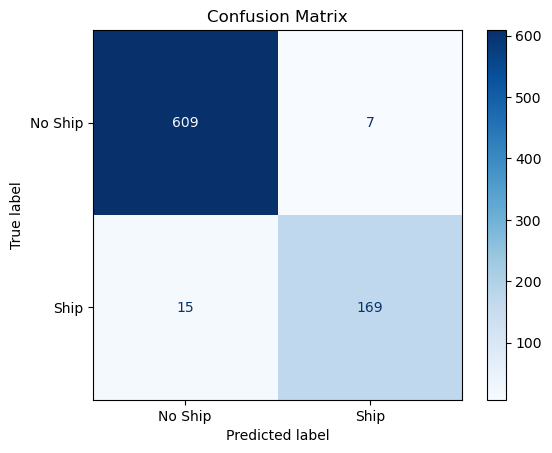

In [51]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Ship', 'Ship'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Generate and print classification report
class_report = classification_report(test_labels, pred_labels, target_names=['No Ship', 'Ship'])
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

     No Ship       0.99      0.97      0.98       616
        Ship       0.90      0.96      0.93       184

    accuracy                           0.97       800
   macro avg       0.94      0.96      0.95       800
weighted avg       0.97      0.97      0.97       800

